In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the file

df = pd.read_csv('50_Startups.csv')

In [3]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# Divide the data into dependents vs independents

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [8]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [9]:
# Feature Encoding - OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [10]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [11]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
len(X_train)

40

In [13]:
len(X_test)

10

In [14]:
X_test

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 0.0, 1.0, 78389.47, 153773.43, 299737.29],
       [0.0, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23]], dtype=object)

In [15]:
y_test

array([192261.83, 191792.06, 111313.02, 125370.37, 129917.04,  96479.51,
        96712.8 , 101004.64, 152211.77,  97483.56])

In [16]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_test

array([[-0.77459667, -0.81649658,  1.85592145,  2.17472402,  0.75220173,
         2.34422946],
       [ 1.29099445, -0.81649658, -0.53881591,  2.11308555,  1.28636008,
         2.1065881 ],
       [-0.77459667, -0.81649658,  1.85592145,  0.22667211,  1.37474243,
         0.87804329],
       [-0.77459667, -0.81649658,  1.85592145,  0.59109717,  1.05395319,
         0.73178005],
       [-0.77459667, -0.81649658,  1.85592145,  1.03614082,  0.2253782 ,
         0.55453842],
       [-0.77459667, -0.81649658,  1.85592145, -0.49859529, -1.16055409,
         0.07510165],
       [ 1.29099445, -0.81649658, -0.53881591, -0.48936464,  1.51936901,
         0.12009817],
       [-0.77459667, -0.81649658,  1.85592145, -0.0597119 ,  1.34739335,
        -0.76328826],
       [-0.77459667, -0.81649658,  1.85592145,  1.17097506,  1.18828305,
         0.97925079],
       [-0.77459667, -0.81649658,  1.85592145, -0.15982766,  1.33521451,
        -0.92452614]])

In [18]:
# Create LR Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Predictions

y_pred = regressor.predict(X_test)

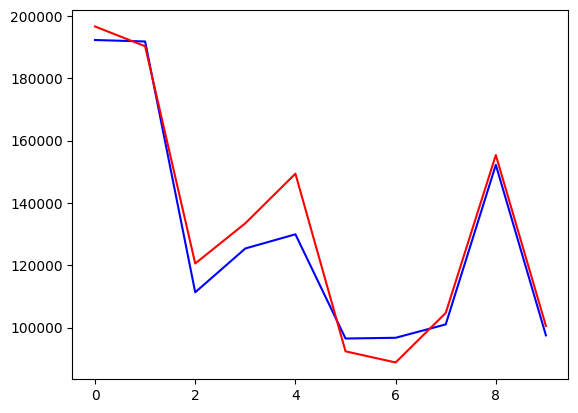

In [22]:
# Plotting of y_test vs y_pred

plt.plot(y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.show()

Out of the box Predictions

In [23]:
data = [[1.0, 0.0, 0.0, 80000, 125000, 250000]]

new_df = pd.DataFrame(data)

In [24]:
new_df = sc.transform(new_df)

In [25]:
new_df

array([[ 1.29099445, -0.81649658, -0.53881591,  0.26275083,  0.3132928 ,
         0.45418116]])

In [26]:
single = regressor.predict(new_df)

In [27]:
print(single)

[117722.6774002]
